#### 2.1.3.1 Improving PMF through interpolation
We can see that this distribution is not very smooth. One thing we might try is to do interpolation between the count values in $Y$.

#### 2.1.3.2 Substituting emperical PMF with GLD
We may instead try to replace the frequency table with the Generalize Lambda Distribution (GLD) which is parameterized by sample statistics.

The GLD family is most easily specified in terms of its percentile (quantile) function.

##### 2.1.3.2.1 Refresher: Quantiles
A quantile is a point or number that partitions a distribution of a data set. Ie. it divides a distribution into contiguous disjoint intervals.

A user can specify to partition a dirstibution into two or more partitions. These resulting partitions may or may not be uniformally sized.

Confusingly, quantile can also refer to the partitions bound by the quantile points. So the first quantile for example refers to both the point along the x-axis that partitions the distribution as well as the partition confined within that point.

There are special names given to specific sets of quantiles. Sets of 4 are quartiles, 10 are deciles, 100 are percentiles. A more exhaustive list is maintained [here](https://en.wikipedia.org/wiki/Quantile#Specialized_quantiles).

Consider the following diagram which shows the normal distribution being divided into four equal quartiles by three quantiles ($Q1,Q2,Q3$).

<img src="./normal_distribution_quantiles.png" alt="Normal Distribution Quantiles" width="400"/>

https://en.wikipedia.org/wiki/Quantile

##### 2.1.3.2.2 Refresher: Quantile Functions

A quantile function returns a value $x_i$ of a random variable $X$ such that the probability of the variable being less than or equal to that value equals a given probability.

$$ Q(p_x) = x : F(x) <= p_x $$

Where $ F(x) = P(X <= x) $.

Under certain circomstances a quantile function is also referred to as the inverse cumulative distribution function.

$$ Q(p_x) = F^{-1}(p_x) = x $$

The function gets its name because it effectively returns the quantile for a given value. So for example, if we want the quantile that will partition the distribution into segments containing 1/4 and 3/4 of the distribution values we would find the quantile $x$ as $Q(p=\frac{1}{4})=x$.

##### 2.1.3.2.2 GLD Definition

$$ Q(y)=Q(y;\lambda_1,\lambda_2,\lambda_3,\lambda_4) = \lambda_1 + \frac{y^{\lambda_3}-(1-y)^{\lambda_4}}{\lambda_3}  $$

where $0 \le y \le 1$.

The probability density function (PDF) for the GLD can be derived from the percentile function and is defined as follows:

$$ f(x) = \frac{\lambda_2}{\lambda_3 y^{\lambda_3 - 1} + \lambda_4(1-y)^{\lambda_4 - 1}} $$

at $x=Q(y)$. ans since $x=Q(y)$ we have $y=F(x)$.

In [12]:
# Generate some data
x = numpy.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
print(x)
y = numpy.array([ 1,  2,  3,  4,  5,  6,  7,  7,  7,  7,  7,  7,  6,  6,  6,  5,  5,  5,  4, 1])
numpy.random.seed(seed=42)
y = numpy.random.normal(loc=5, scale = 2, size=len(x)).astype(int)
print(y)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[5 4 6 8 4 4 8 6 4 6 4 4 5 1 1 3 2 5 3 2]


In [14]:
# Determine how many bins to use for the histogram
range_of_y_values = int(max(y) - min(y)) + 1
bin_count = range_of_y_values
print("range of y values: {0} -> {1} = {2}".format(min(y), max(y), range_of_y_values))
print("bin count: {0}".format(bin_count))

# Generate histogram data for the values of 
counts, bin_edges = numpy.histogram(y, bins=bin_count)
print("edges: {0}".format(bin_edges))
print("num of edges: {0}".format(len(bin_edges)))
print("counts: {0}".format(counts))
print("num of counts: {0}".format(len(counts)))

# Determine the midpoints of the bin
bin_widths = numpy.diff(bin_edges)
distance_from_lower_din_edge = bin_widths/2
bin_midpoints = bin_edges[:-1] + bin_widths
print("bin midpoints: {0}".format(bin_midpoints))

# Calculate the probability of the given bin
N = range_of_y_values
p = numpy.array([counts[i]/N  for i in range(0, N)])
F = p.cumsum()

import pandas
print(pandas.DataFrame({"y": bin_midpoints, "c": counts}))
print(pandas.DataFrame({"y": bin_midpoints, "p": p}))

range of y values: 1 -> 8 = 8
bin count: 8
edges: [1.    1.875 2.75  3.625 4.5   5.375 6.25  7.125 8.   ]
num of edges: 9
counts: [2 2 2 6 3 3 0 2]
num of counts: 8
bin midpoints: [1.875 2.75  3.625 4.5   5.375 6.25  7.125 8.   ]
       y  c
0  1.875  2
1  2.750  2
2  3.625  2
3  4.500  6
4  5.375  3
5  6.250  3
6  7.125  0
7  8.000  2
       y      p
0  1.875  0.250
1  2.750  0.250
2  3.625  0.250
3  4.500  0.750
4  5.375  0.375
5  6.250  0.375
6  7.125  0.000
7  8.000  0.250


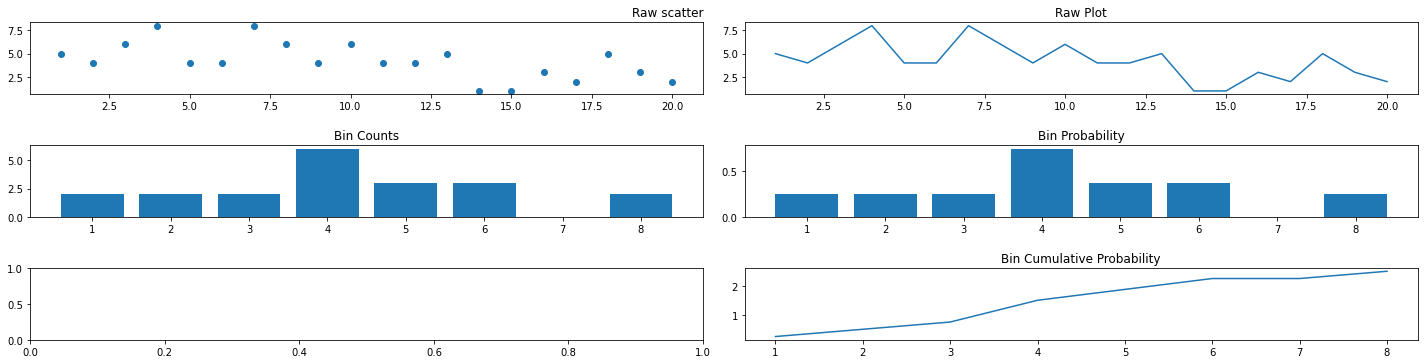

In [15]:
# Get setup to print a series of charts
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 5))
fig.tight_layout(h_pad=3)
axes[0, 0].scatter(x, y)
axes[0, 0].set_title(label="Raw scatter", loc="right")
axes[0, 1].plot(x, y)
axes[0, 1].set_title(label="Raw Plot")
axes[1, 0].bar(numpy.arange(min(y), max(y)+1), counts)
axes[1, 0].set_title(label="Bin Counts")
axes[1, 1].bar(numpy.arange(min(y), max(y)+1), p)
axes[1, 1].set_title(label="Bin Probability")
axes[2, 1].plot(numpy.arange(min(y), max(y)+1), F)
axes[2, 1].set_title(label="Bin Cumulative Probability");

In [16]:
import scipy.stats
alphas = [
    y.mean(),
    y.std(),    
    scipy.stats.skew(y),
    scipy.stats.kurtosis(y)
]
alphas

[4.25, 1.920286436967152, 0.19329743393085036, -0.4117207698937091]

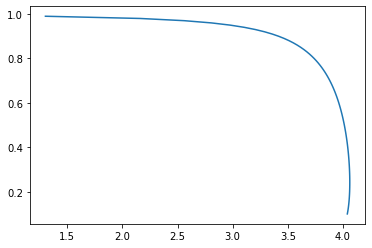

In [322]:
def Q(y, lambdas):
    numerator = y ** lambdas[2] - (1 - y) ** lambdas[3]
    denominator = lambdas[1]
    answer = lambdas[0] + (numerator / denominator)
    return answer


Q_y = numpy.arange(0.1, 1, 0.01)
Q_x = [Q(y, lambdas) for y in Q_y]
plt.plot(Q_x, Q_y);

In [291]:
def gld_pdf(x):        

    numerator = lambdas[1]
    
    t1 = lambdas[2] * y ** (lambdas[2] - 1)
    t2 = lambdas[3] *(1 - y) ** (lambdas[3] - 1)    
    denominator = t1 + t2
    
    answer = numerator / denominator
    print("gld: {0}/{1}={2}".format(numerator, denominator, answer))
    
    return answer

# In this case, the y values are those of the probability function denoted p
#gld_x = numpy.arange(1, range_of_y_values + 1)
#print("x: {0}".format(gld_y))
#gld_f = [gld_qunatile_function(y) for y in gld_y]
#print("f: {0}".format(gld_f))

gld_pdf(1)

ZeroDivisionError: 0.0 cannot be raised to a negative power

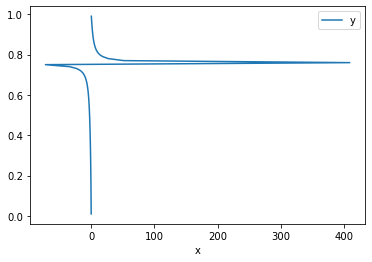

In [272]:
df = pandas.DataFrame({"x": gld_x, "y": gld_y})
subplot = df.plot("x", "y")

In [53]:
2 ** 3

8

# 2.2 Histogram with Pandas
Pandas makes a histogram much easier becasue it hides a lot of the complexitied found in numpy.

The DataFrame.hist() function calls matplotlib.pyplot.hist(), on each series in the DataFrame, resulting in one histogram per column.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

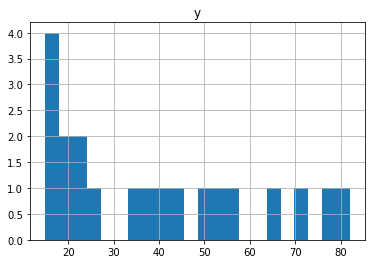

In [8]:
import pandas
df = pandas.DataFrame({"x": x, "y": y})
subplots = df.hist("y", bins=bins)

We can get information about the bins and count by defaulting to the numpy methods

In [9]:
counts, bin_edges = numpy.histogram(df["y"].to_numpy(), bins=bins)

# 3. Smoothing techniques

In [ ]:
interpolation, smoothing, gld

In [53]:
# import a library to help us explore
from scipy import stats